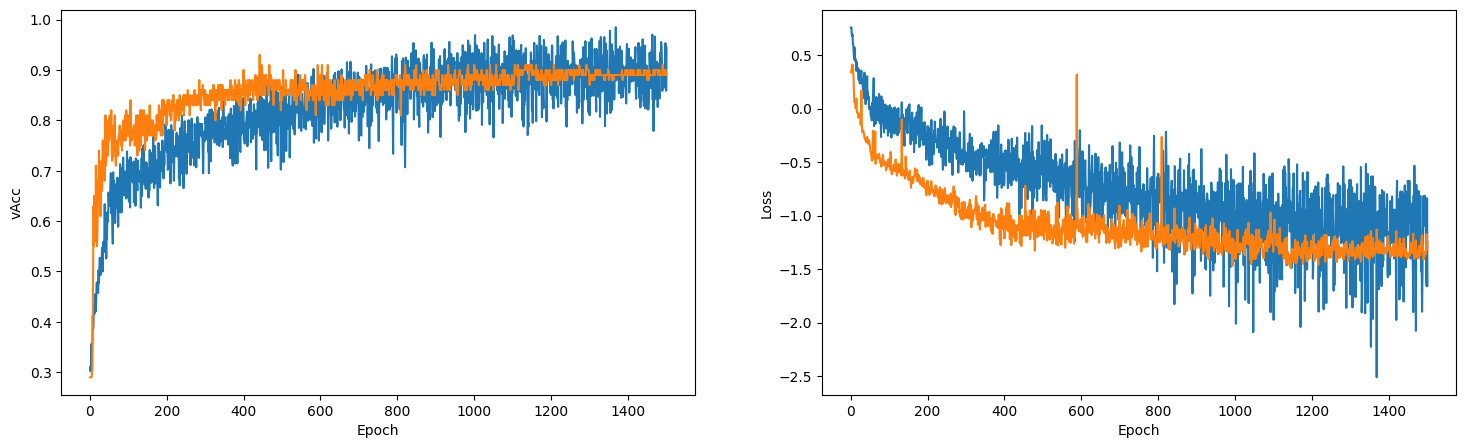

In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

path = "/root/app/competition_hist_0425_012442.csv"
df = pd.read_csv(path)

fig = plt.figure(dpi=100, figsize=(18, 5))

ax1 = fig.add_subplot(1, 2, 1)    # 1行2列の1番目

x_col = "Epoch"
ax1.set_xlabel(x_col)
x = df[x_col]

y_col = "Acc"
ax1.set_ylabel(y_col)
y = df[y_col]

ax1.plot(x, y)

y_col = "vAcc"
ax1.set_ylabel(y_col)
y = df[y_col]

ax1.plot(x, y)

ax2 = fig.add_subplot(1, 2, 2)

x_col = "Epoch"
ax2.set_xlabel(x_col)
x = df[x_col]

y_col = "Loss"
ax2.set_ylabel(y_col)
y = df[y_col]

y = df["Loss"]
ax2.plot(x, np.log(y))
y = df["vLoss"]
ax2.plot(x, np.log(y))
plt.show()

# def plot_df(df, x_col, y_col, axes):
